# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Turning mouse data and study results into a dataframe
mouse_metadata_DF = pd.DataFrame(mouse_metadata)
study_results_DF = pd.DataFrame(study_results)

# Combine the data into a single DataFrame
merged_studydata_DF = pd.merge(study_results_DF, mouse_metadata_DF, on="Mouse ID", how="left")

# Display the data table for preview
merged_studydata_DF.head(21)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
5,h246,0,45.0,0,Ketapril,Male,13,30
6,p189,0,45.0,0,Ketapril,Male,8,28
7,n923,0,45.0,0,Ketapril,Male,19,30
8,q119,0,45.0,0,Ketapril,Male,17,30
9,f993,0,45.0,0,Naftisol,Male,21,28


In [11]:
# Checking the number of mice.
mice_count = merged_studydata_DF["Mouse ID"].value_counts()
cleaned_mice_count = mice_count.count()
print(cleaned_mice_count)

249


In [12]:
# Our data should be uniquely identified by Mouse ID and Timepoint

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_ID = merged_studydata_DF.loc[merged_studydata_DF.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_ID

array(['g989'], dtype=object)

In [13]:
# Optional: Get all the data for the duplicate mouse ID. 

merged_studydata_DF.loc[merged_studydata_DF["Mouse ID"] == "g989", :]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [39]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

cleaned_studydata_DF = merged_studydata_DF[merged_studydata_DF["Mouse ID"].isin(duplicate_ID)==False]
cleaned_studydata_DF.head(275)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
272,q633,5,47.183802,0,Zoniferol,Male,12,25
273,f129,5,47.000594,0,Zoniferol,Female,11,29
274,q483,5,46.776816,1,Ceftamin,Male,6,26
275,a444,5,44.005975,0,Ramicane,Female,10,25


In [15]:
# Checking the number of mice in the clean DataFrame.

New_mice_count = len(cleaned_studydata_DF["Mouse ID"].unique())
print(New_mice_count)

248


## Summary Statistics

In [16]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: Dataframe that includes each drug with each  
#mean, median, variance, standard deviation, and SEM of the tumor volume
# Assemble the resulting series into a single summary DataFrame.
mean = cleaned_studydata_DF["Tumor Volume (mm3)"].groupby(cleaned_studydata_DF["Drug Regimen"]).mean()
median = cleaned_studydata_DF["Tumor Volume (mm3)"].groupby(cleaned_studydata_DF["Drug Regimen"]).mean()
var = cleaned_studydata_DF["Tumor Volume (mm3)"].groupby(cleaned_studydata_DF["Drug Regimen"]).mean()
std = cleaned_studydata_DF["Tumor Volume (mm3)"].groupby(cleaned_studydata_DF["Drug Regimen"]).mean()
sem = cleaned_studydata_DF["Tumor Volume (mm3)"].groupby(cleaned_studydata_DF["Drug Regimen"]).mean()


Summary_Statistics_DF = pd.DataFrame({"Mean Tumor Volume": mean,
                  "Median Tumor Volume": median,
                  "Variance Tumor Volume": var,
                  "Standard Deviation Tumor Volume": std,
                  "SEM Tumor Volume": sem})

Summary_Statistics_DF.head()

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,40.675741,40.675741,40.675741,40.675741
Ceftamin,52.591172,52.591172,52.591172,52.591172,52.591172
Infubinol,52.884795,52.884795,52.884795,52.884795,52.884795
Ketapril,55.235638,55.235638,55.235638,55.235638,55.235638
Naftisol,54.331565,54.331565,54.331565,54.331565,54.331565


In [17]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_method = Summary_Statistics_DF(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean","median","var","std","sem"])
agg_method.head()

TypeError: 'DataFrame' object is not callable

## Bar and Pie Charts

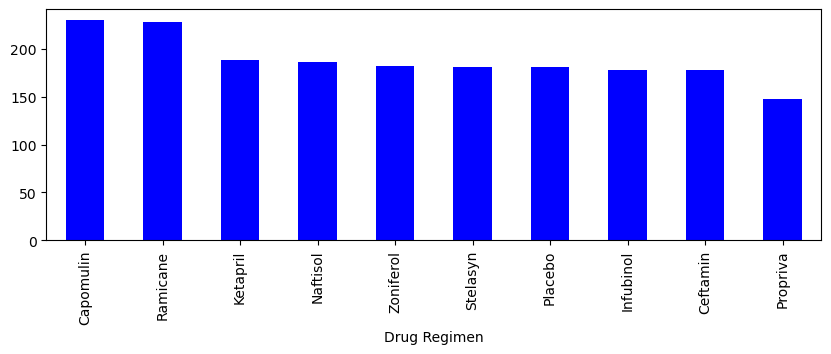

In [54]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

TPs_to_DR = cleaned_studydata_DF["Drug Regimen"].value_counts()
TPs_to_DR_graph = TPs_to_DR.plot(kind="bar", facecolor="blue", figsize=(10,3))



plt.show()

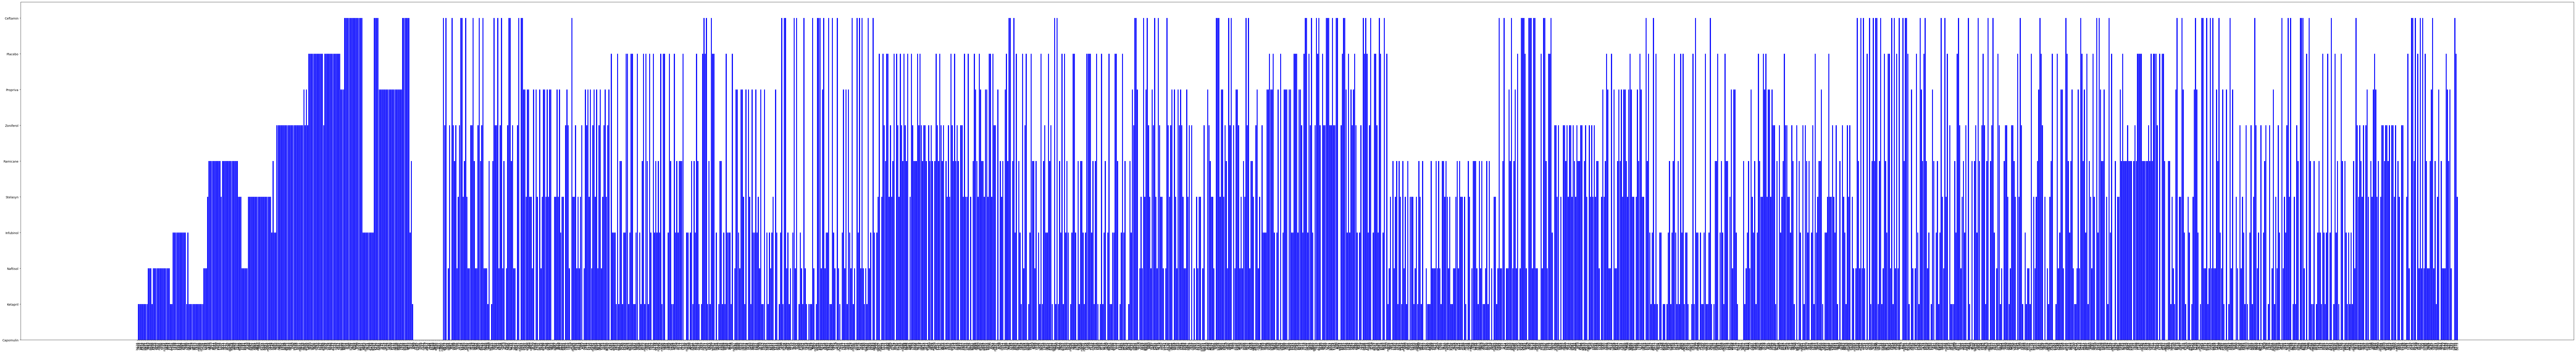

In [50]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

x_axis = np.arange(len(cleaned_studydata_DF))
tick_location = [value for value in x_axis]

plt.figure(figsize=(150,20))
plt.bar(x_axis, cleaned_studydata_DF["Drug Regimen"], color="b", alpha=1)
plt.xticks(tick_location, cleaned_studydata_DF["Mouse ID"], rotation="vertical")


plt.xlabel=("Drug Regimen")
plt.ylabel=("Number of Observed Timepoints")
plt.title=("Observed Timepoints per Regimen with Myplot")
plt.show()

In [52]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

#Mmice_to_Fmice = cleaned_studydata_DF["Sex"]
#Mmice_to_Fmice_graph = Mmice_to_Fmice.plot(kind="pie", facecolor="blue", figsize=(10,3))
#plt.title("Observed Timepoints per Drug Regimen with Pandas")

#plt.show()

0       Female
1         Male
2       Female
3       Female
4         Male
         ...  
1888      Male
1889      Male
1890    Female
1891    Female
1892    Female
Name: Sex, Length: 1880, dtype: object


In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds

    
    ## Answer = Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
              # Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
              # Infubinol's potential outliers: 31    36.321346
              # Name: Tumor Volume (mm3), dtype: float64
              # Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

In [ ]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

## Answer = The correlation between mouse weight and the average tumor volume is 0.84